Матрица Р вероятностей $P_k_v$ переходов за один шаг

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
from random import uniform, randint
from scipy.stats import gamma
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
def printMatrix ( matrix,l ): 
   for row in matrix: 
      for x in row: 
          print ( np.round(x,l), end = "\t" ) 
      print ()
n=5
B = [[round(uniform(0, 1/n),2) for j in range(n)] for i in range(n)]
def res(row):
  s=sum(row)
  c=randint(0,n-1)
  if s-1!=0:
    if row[c]>=s-1: row[c]=row[c]-(s-1)
    else: 
      row[c]=0
      res(row)

print('\nP')
for row in B:
  row=res(row)
printMatrix(B,2)
P=np.array(B)

cpu

P
0.66	0.2	0.08	0.03	0.03	
0.01	0.08	0.75	0.15	0.01	
0.02	0.58	0.12	0.17	0.11	
0.15	0.14	0.08	0.61	0.02	
0.42	0.19	0.06	0.17	0.16	


In [ ]:
T = np.transpose(np.array([[0,1,0],[1,1,1]]))
print(T)

[[0 1]
 [1 1]
 [0 1]]


In [ ]:
print(P)
l=np.copy(np.transpose(P))
for i in range(n-1):
  for j in range(n-1):
    if i==j:
      l[i][j]=P[i][j]-1
print('\n')
print(l)


[[0.07 0.71 0.06 0.06 0.1 ]
 [0.14 0.07 0.45 0.16 0.18]
 [0.38 0.14 0.15 0.14 0.19]
 [0.12 0.59 0.09 0.15 0.05]
 [0.13 0.08 0.05 0.61 0.13]]


[[-0.93  0.14  0.38  0.12  0.13]
 [ 0.71 -0.93  0.14  0.59  0.08]
 [ 0.06  0.45 -0.85  0.09  0.05]
 [ 0.06  0.16  0.14 -0.85  0.61]
 [ 0.1   0.18  0.19  0.05  0.13]]


Матричная запись коэфициентов систему $r(k)$

In [ ]:
for c in range(n):
  l[n-1][c]=1
printMatrix(l,2)

-0.93	0.14	0.38	0.12	0.13	
0.71	-0.93	0.14	0.59	0.08	
0.06	0.45	-0.85	0.09	0.05	
0.06	0.16	0.14	-0.85	0.61	
1.0	1.0	1.0	1.0	1.0	


Значение системы $r(k)$

In [ ]:
R = np.full((n,1), 0)
R[n-1][0]=1
print(R)

[[0]
 [0]
 [0]
 [0]
 [1]]


$r(k) - $ стационарное распределение вероятностей значений вложеной цепи Маркова

In [ ]:
P_Q=np.linalg.inv(l)
R=P_Q.dot(R)
print(R)
print('\n Проверка на нормировку ',list(sum(R)))

[[0.1703674 ]
 [0.29730689]
 [0.19839059]
 [0.19812757]
 [0.13580755]]

 Проверка на нормировку  [0.9999999999999999]


In [ ]:
def G_(x,k,v):
  return float(gamma.cdf(x,a=(2/n)*(k), scale=(2/n)*(v)))
#print(G_(10,1,1))

def I(x):
  T=np.array([[G_(x,j,i) if i==j else 0 for j in range(1,n+1)] for i in range(1,n+1)])
  return np.copy(P).dot(T)

def II(x):
  T=np.array([[G_(x,j,i) if i==j else 0 for j in range(1,n+1)] for i in range(1,n+1)])
  return T

def A(x):
  Q=[[G_(x,j,i)*P[i-1][j-1] for j in range(1,n+1)] for i in range(1,n+1)]
  return np.array(Q)

print(II(5))
print()
print(I(100))
#print('\n',A(10))
r=np.copy(np.transpose(R))
E=np.array([[1] for c in range(n)])
#print(r,'\n',E)

def F(x):
  return float(1-float(gamma.cdf(x,a=1.5, scale=1)))

def F_I(x):
  return float(1-(r.dot(I(x))).dot(E))

def F_A(x):
  return float((r.dot(P-A(x))).dot(E))
print('1-F_I = ',F_I(100),'\n','1-F_A = ',F_A(100))

[[0.99999965 0.         0.         0.         0.        ]
 [0.         0.99888208 0.         0.         0.        ]
 [0.         0.         0.97660916 0.         0.        ]
 [0.         0.         0.         0.88562349 0.        ]
 [0.         0.         0.         0.         0.7127025 ]]

[[0.07 0.71 0.06 0.06 0.1 ]
 [0.14 0.07 0.45 0.16 0.18]
 [0.38 0.14 0.15 0.14 0.19]
 [0.12 0.59 0.09 0.15 0.05]
 [0.13 0.08 0.05 0.61 0.13]]
1-F_I =  1.1102230246251565e-16 
 1-F_A =  0.0


In [ ]:
def it_():
  v, err = integrate.quad(F, 0, 100)
  return v

def it_I():
  v, err = integrate.quad(F_I, 0, 100)
  return v

def it_A():
  v, err = integrate.quad(F_A, 0, 100)
  return v
lamda=1/it_()  
lamda_I=1/it_I()
lamda_A=1/it_A()
print(lamda,'\n',lamda_I,'\n',lamda_A)
print(1/lamda,'\n',1/lamda_I,'\n',1/lamda_A)
t=10
print(lamda*t,'\n',lamda_I*t,'\n',lamda_A*t)

0.6666666666666982 
 0.7358480885195179 
 0.9613554257036834
1.4999999999999292 
 1.358976146845662 
 1.0401980092513963


0.9241231367386356


In [ ]:
k = np.arange(1,n+1,1)
v = np.arange(1,n+1,1)
y_v = [pdf_v(t) for t in range(0,n)]
y_k = [pdf_k(t) for t in range(0,n)]


<ipython-input-82-ea80b23b64d6>:5: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  v, err = integrate.quad(a_kv, 0, 2000,args = (k, v))


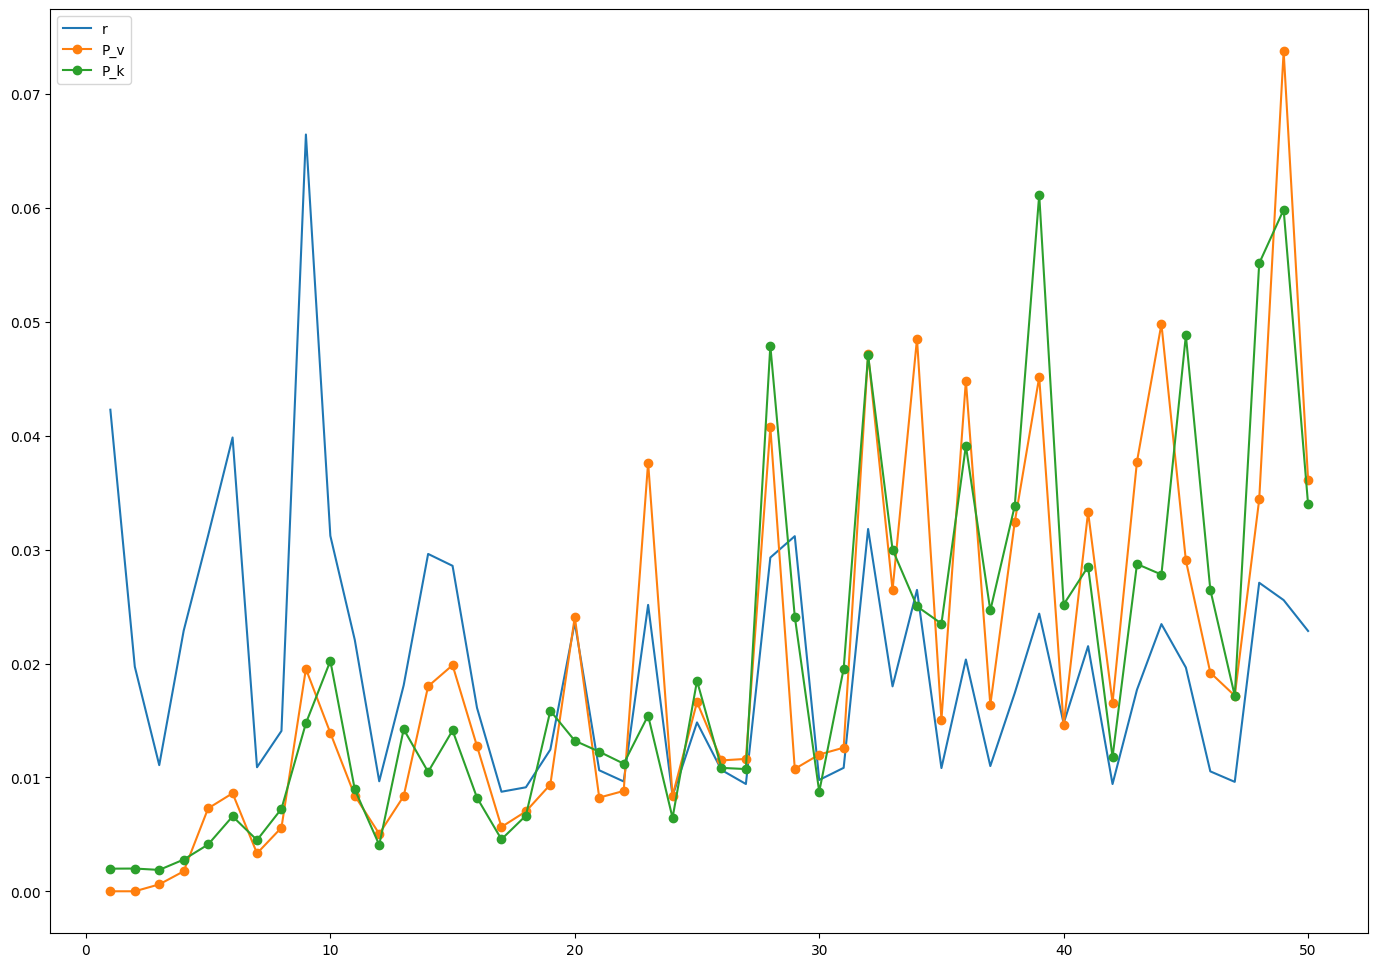

In [ ]:
fig = plt.figure(figsize=(17, 12))
plt.plot(k,r[k-1])
plt.plot(v,y_v,marker = 'o')
plt.plot(k,y_k,marker = 'o')
plt.legend(["r", "P_v", "P_k"], loc="upper left")
plt.show()

In [ ]:
x = np.arange(1,n+1,1)
y = np.arange(1,n+1,1)
x_grid, y_grid = np.meshgrid(x, y)
P_kv_grid=np.array([[pdf_kv(j,i) for j in range(n)] for i in range(n)])

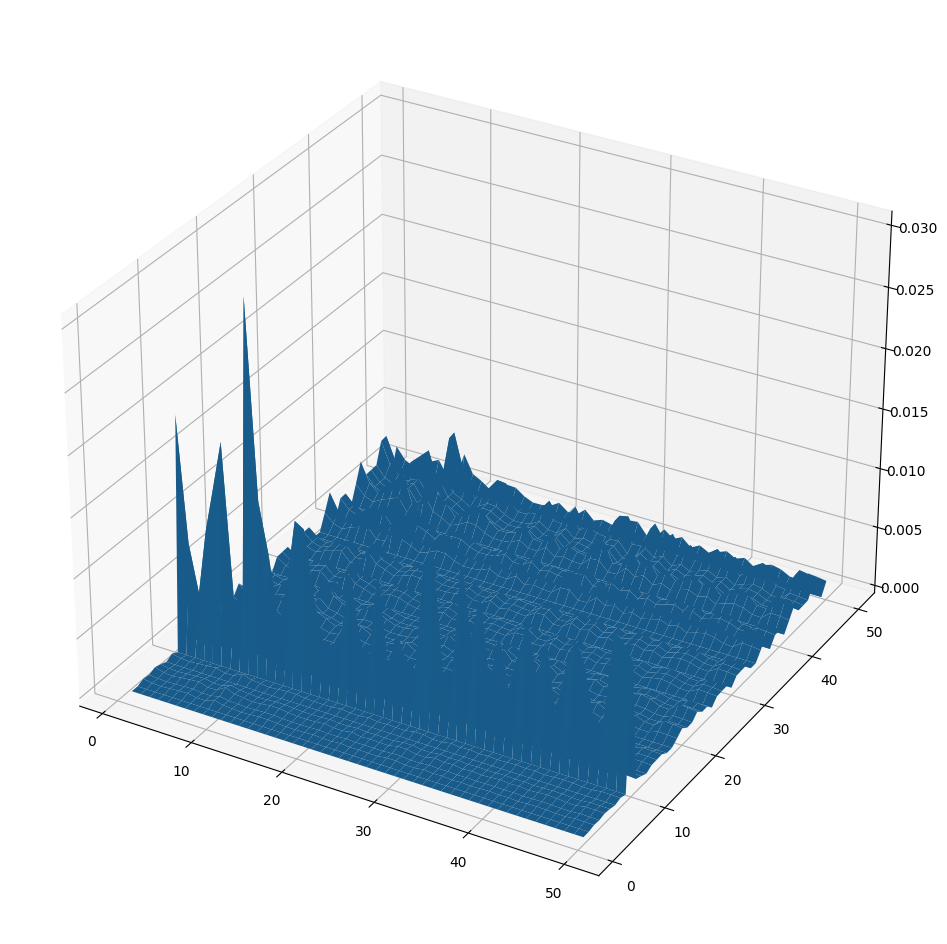

In [ ]:
fig = plt.figure(figsize=(17, 12))
ax_3d = fig.add_subplot(projection='3d')
ax_3d.plot_surface(x_grid, y_grid, P_kv_grid)

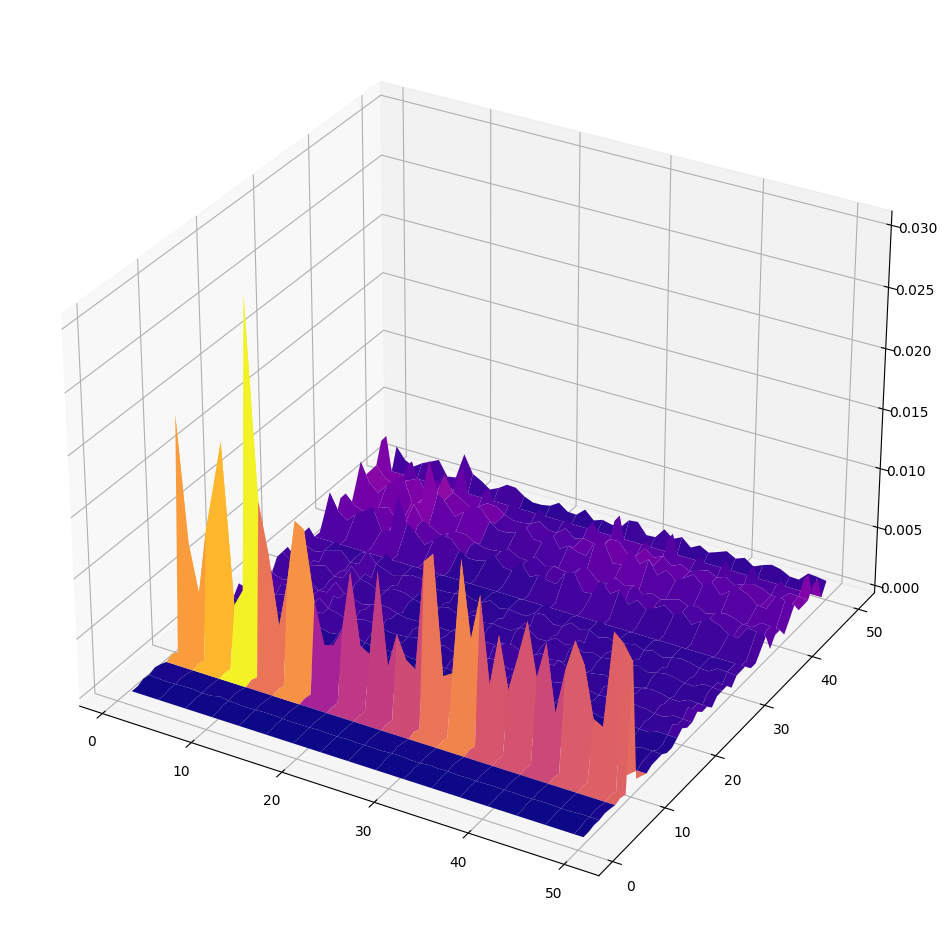

In [ ]:
fig = plt.figure(figsize=(17, 12))
ax_3d = fig.add_subplot(projection='3d')
ax_3d.plot_surface(x_grid, y_grid, P_kv_grid, rstride=int(n/25)+1, cstride=int(n/25)+1, cmap='plasma')